<a href="https://colab.research.google.com/github/pmontecinos23/Spanish-Wine-Evaluation/blob/main/Spanish_Wine_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spanish Wine Evaluation
Author: Paul Montecinos


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports below are temporary. I will filter through and clean it up once my data set is selected

In [2]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
## seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

## Regression Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Loading Wine Data

### Data Source: 
https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download

In [3]:
wine = pd.read_csv('/content/drive/MyDrive/Stack 2 Machine Learning/03 Week 3: Classification Models/Project 2/wines_SPA.csv')
wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Brief Description: with 7500 different wines we can use this data to determining ratings and popularity of spanish wines

Target: Rating

Row represent: Wines

Classification or Regression: As an avid wine drinker, I would do a classification model determining the highest rated wines.

Features: There are 11 features in this dataset

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [6]:
# How many rows
print(f'Number of rows:{len(wine.axes[0])}')

Number of rows:7500


Challenges: 
* Total missing fields is 2885. Most of them are in the body and acidity type - determining what data I will fill into missing rows
* There are lot of objects in this data to potentially convert - Potentially cause overfitting - determining which features to drop


In [7]:
wine.shape
print(f'There are {wine.shape[0]} rows, and {wine.shape[1]} columns.')
print(f'The rows represent {wine.shape[0]} observations, and the columns represent {wine.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


## Data Cleaning

In [8]:
## make columns lowercase for ease of reference and display names
wine.columns = wine.columns.str.lower()
wine.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

### Checking for Duplicates

In [9]:
# checking for duplicates
wine.duplicated().sum()

5452

### Removing Duplicates

In [10]:
wine = wine.drop_duplicates()
wine.duplicated().sum()

0

In [43]:
# checking breadown of numeric columns
wine.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


### Checking for categorical errors

In [11]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(wine)
for col in cat_cols:
  display(wine[col].value_counts(normalize=True))

Vega Sicilia                            0.047363
Alvaro Palacios                         0.023438
Artadi                                  0.020996
La Rioja Alta                           0.017578
Marques de Murrieta                     0.016113
                                          ...   
Valdelosfrailes                         0.000488
Briego                                  0.000488
Guillem Carol - Cellers Carol Valles    0.000488
Particular                              0.000488
Binigrau                                0.000488
Name: winery, Length: 480, dtype: float64

Tinto                                                 0.027344
Unico                                                 0.020020
Valbuena 5o                                           0.015625
Reserva                                               0.015137
Priorat                                               0.012695
                                                        ...   
San Valentin Parellada                                0.000488
Silvanus Edicion Limitada Ribera del Duero            0.000488
El Jardin de las Iguales Vinedo Historico Garnacha    0.000488
Garnacha Vinas Centenarias                            0.000488
Capricho Crianza                                      0.000488
Name: wine, Length: 847, dtype: float64

2016    0.118768
2017    0.117302
2015    0.100684
2018    0.095797
2014    0.077224
          ...   
1953    0.000489
1972    0.000489
1974    0.000489
1931    0.000489
1925    0.000489
Name: year, Length: 71, dtype: float64

Espana    1.0
Name: country, dtype: float64

Ribera del Duero                   0.264160
Rioja                              0.233887
Priorato                           0.122070
Toro                               0.040039
Castilla y Leon                    0.024902
                                     ...   
Ribera del Gallego-Cinco Villas    0.000488
Monterrei                          0.000488
Jerez Cream                        0.000488
Condado de Huelva                  0.000488
Abona                              0.000488
Name: region, Length: 76, dtype: float64

Ribera Del Duero Red    0.275489
Rioja Red               0.232235
Priorat Red             0.122554
Red                     0.108136
Toro Red                0.040165
Tempranillo             0.037590
Sherry                  0.028836
Rioja White             0.019053
Pedro Ximenez           0.018023
Grenache                0.018023
Albarino                0.017508
Cava                    0.016993
Verdejo                 0.013903
Monastrell              0.009269
Mencia                  0.008754
Montsant Red            0.008754
Syrah                   0.007724
Chardonnay              0.006694
Cabernet Sauvignon      0.005664
Sparkling               0.002575
Sauvignon Blanc         0.002060
Name: type, dtype: float64

### Checking for missing values

In [12]:
wine.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [13]:
wine[wine.isna().any(axis = 1)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


In [16]:
# Dropping columns 
wine1 = wine.drop(columns=['country', 'wine', 'year', 'winery'])
wine1.head()

,rating,num_reviews,region,price,type,body,acidity
0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Creating a new dataframe and dropping a few columns for exploratory visuals.

Will address the rest of the missing values during preprocessing.

I may bring back the dropped columns before splitting for train test split.

In [35]:
wine1.value_counts()

rating  num_reviews  region            price    type                  body  acidity
4.2     151          Campo de Borja    28.90    Grenache              5.0   3.0        1
4.5     32           Bierzo            120.00   Mencia                3.0   3.0        1
        36           Bierzo            1373.66  Red                   4.0   3.0        1
        35           Ribera del Duero  157.00   Ribera Del Duero Red  5.0   3.0        1
        34           Montilla-Moriles  295.00   Pedro Ximenez         5.0   1.0        1
                                                                                      ..
4.3     260          Rioja             63.95    Rioja Red             4.0   3.0        1
        258          Rioja             12.90    Rioja Red             4.0   3.0        1
        251          Ribera del Duero  107.74   Ribera Del Duero Red  5.0   3.0        1
        249          Priorato          162.50   Priorat Red           4.0   3.0        1
4.9     58           Toro 

In [36]:
wine1['rating'].value_counts()

4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64

In [38]:
wine1.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


## Visuals

### Histogram for each numeric variable

following Histplots were adapted from: https://www.python-graph-gallery.com/20-basic-histogram-seaborn 

### Ratings histplot

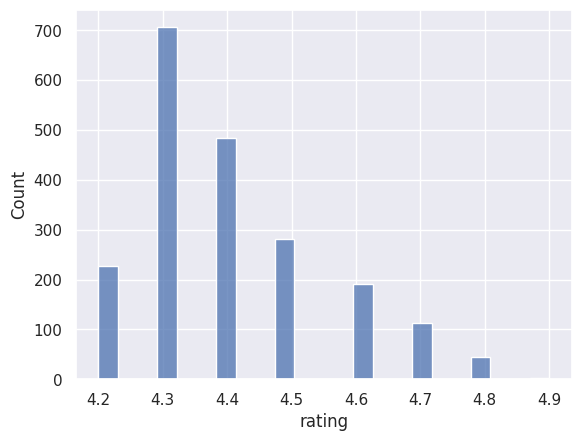

In [20]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="rating")
plt.show()

Wine ratings by count

706 wines have been rated 4.3. This represents most of the wines in the data set.

44 wines were rated 4.8 representing the 2nd least rating frquency.


### Price histplot

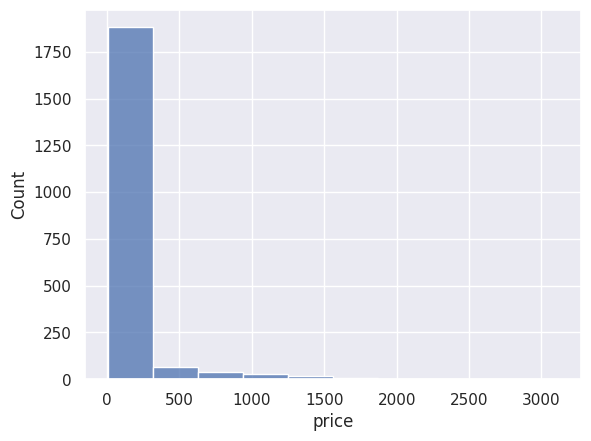

In [32]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="price", bins=10)
plt.show()

### Body histplot

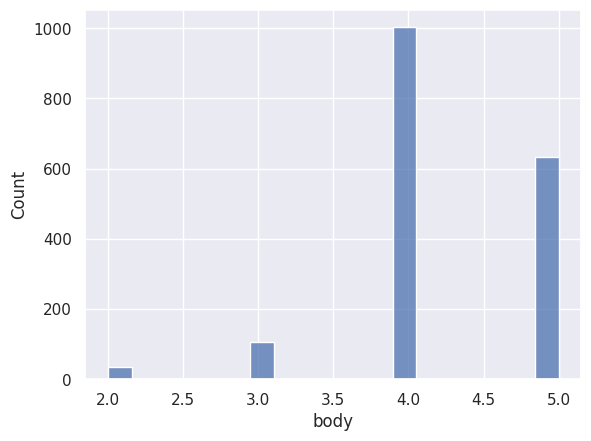

In [23]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="body")
plt.show()

### Acidity histplot

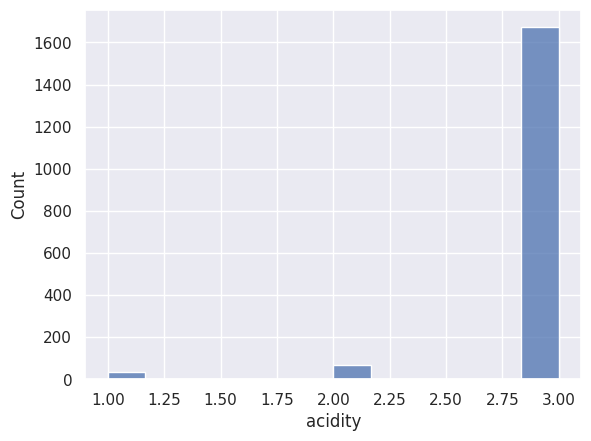

In [24]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="acidity")
plt.show()

### Number of reviews histplot

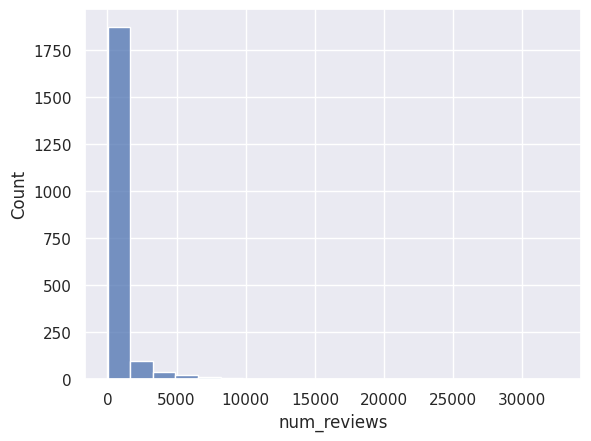

In [34]:
sns.set(style="darkgrid")

sns.histplot(data=wine1, x="num_reviews",bins=20)
plt.show()

## Categorical variable visuals

Following countplots adapted from: https://datagy.io/seaborn-countplot/ and from notes/classes

### Region Countplot

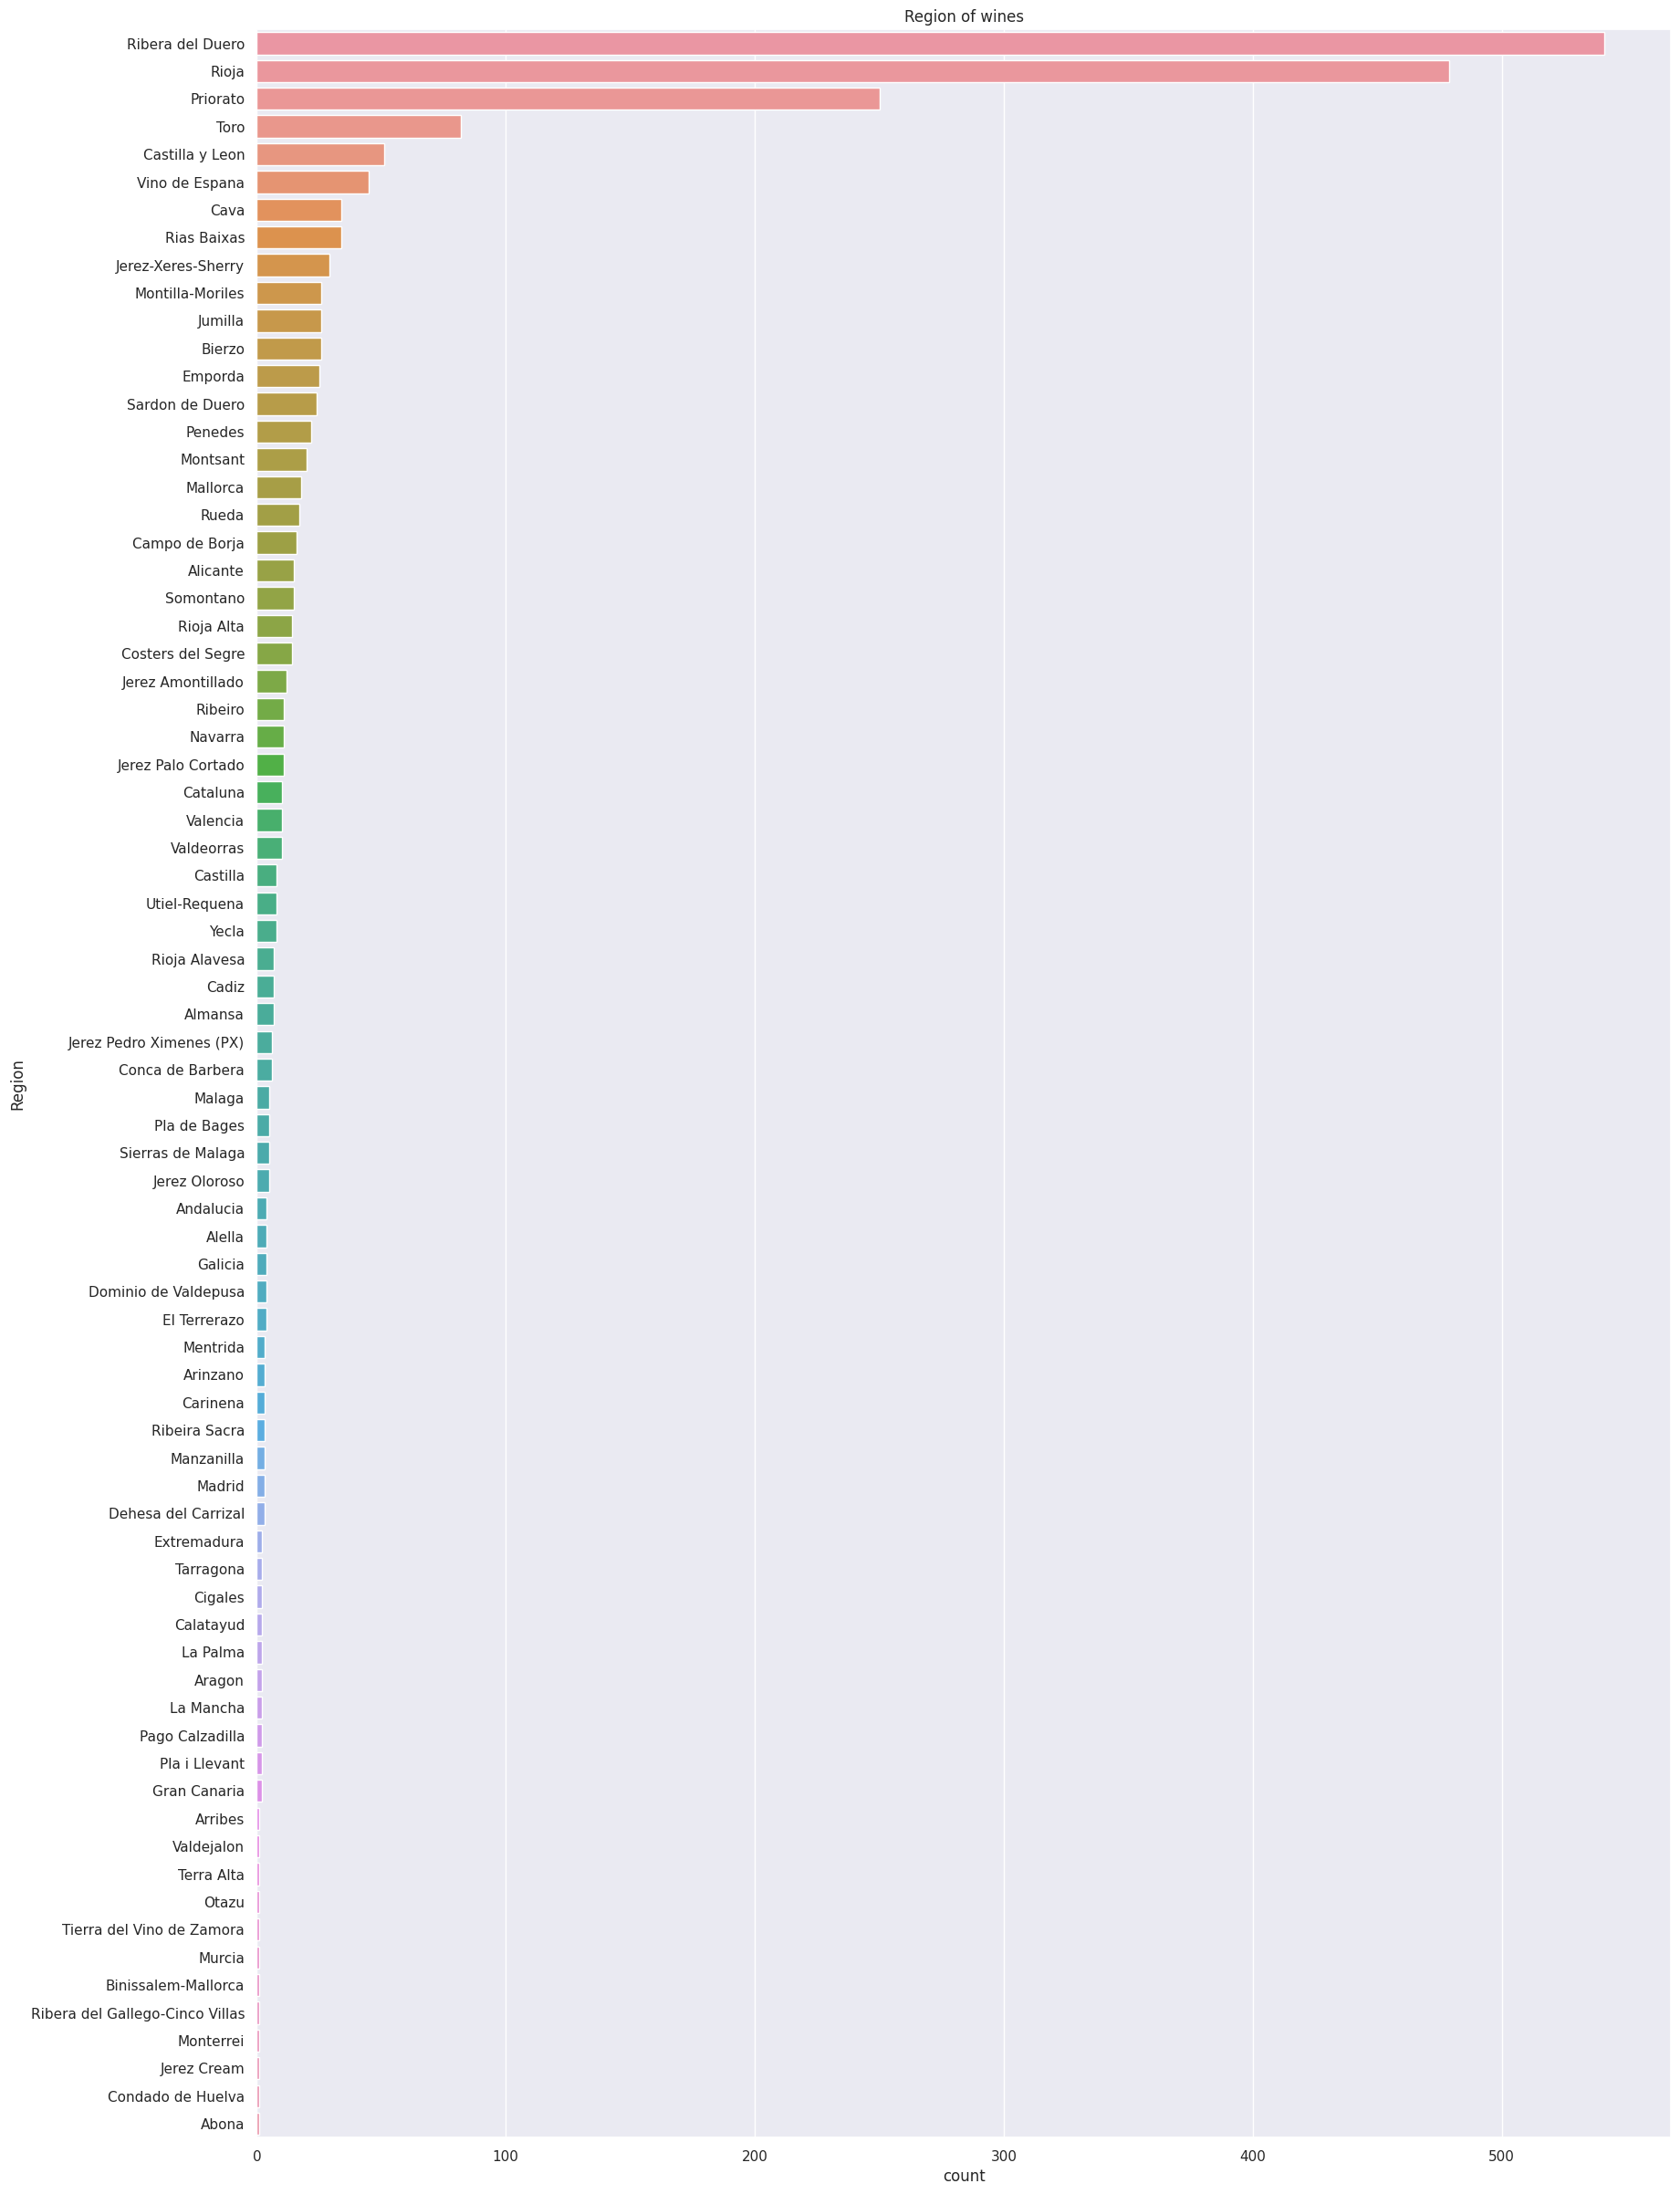

In [40]:
fig, ax = plt.subplots(figsize=(20,30))

sns.countplot(data = wine1, y = 'region', order = wine1['region'].value_counts().index)

ax.set(title = 'Region of wines')
ax.set(ylabel = 'Region');

### Wine type Countplot

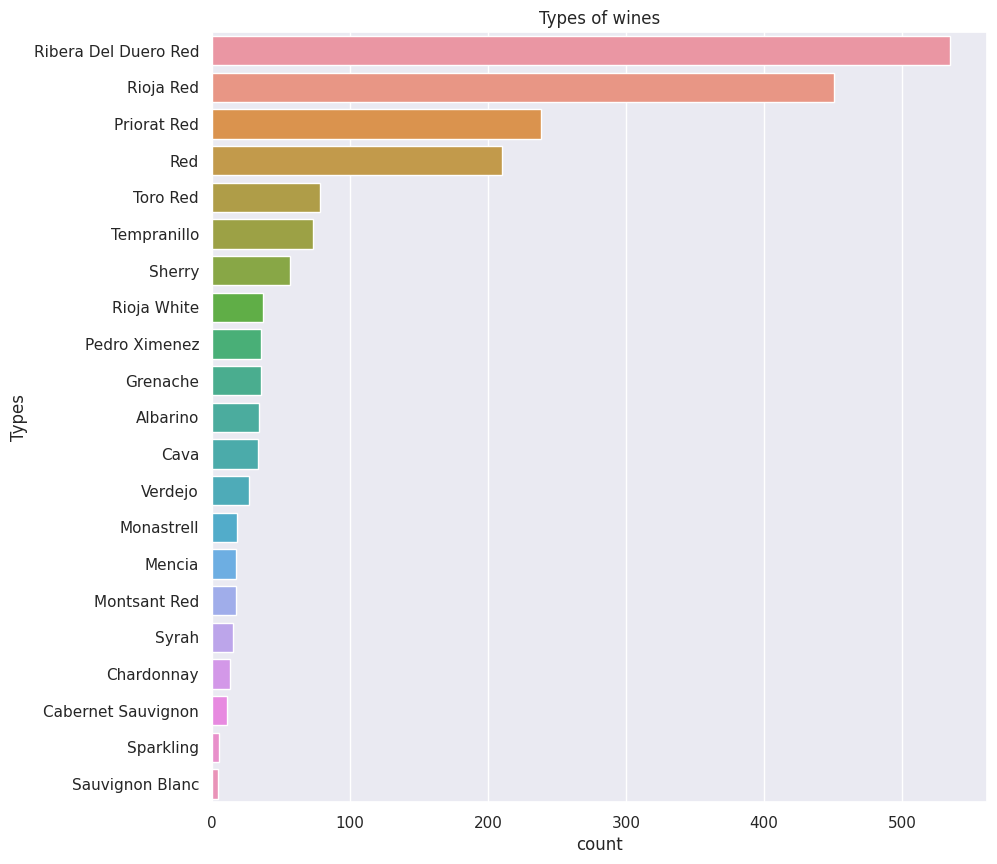

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

sns.countplot(data = wine1, y = 'type', order = wine1['type'].value_counts().index)

ax.set(title = 'Types of wines')
ax.set(ylabel = 'Types');

### Heatmap comparing all numeric variable


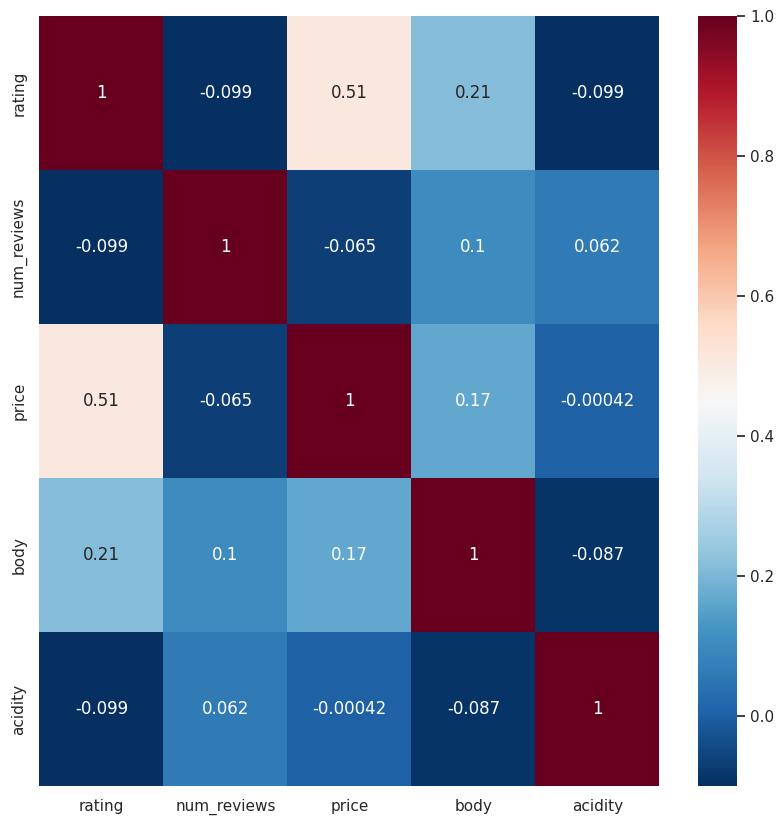

In [17]:
corr = wine1.corr()
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap = 'RdBu_r', annot = True);

Using the heatmap above you can see there is a moderate correlation between the price and the rating. This usually means the better rated the wine is the more expensive. Thats not to say you cant find a hidden gem for cheaper.

### boxplot comparing body, rating, and acidity

Code adapted from: https://www.analyticsvidhya.com/blog/2021/06/eda-exploratory-data-analysis-with-python/

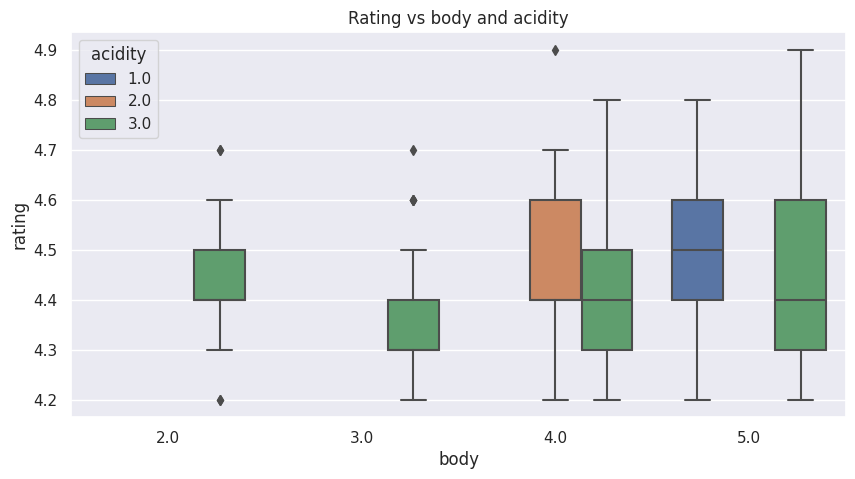

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(data =wine1, x='body', y='rating', hue ='acidity')
plt.title('Rating vs body and acidity')
plt.show()

### Pairplot
code adapted from: https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117 

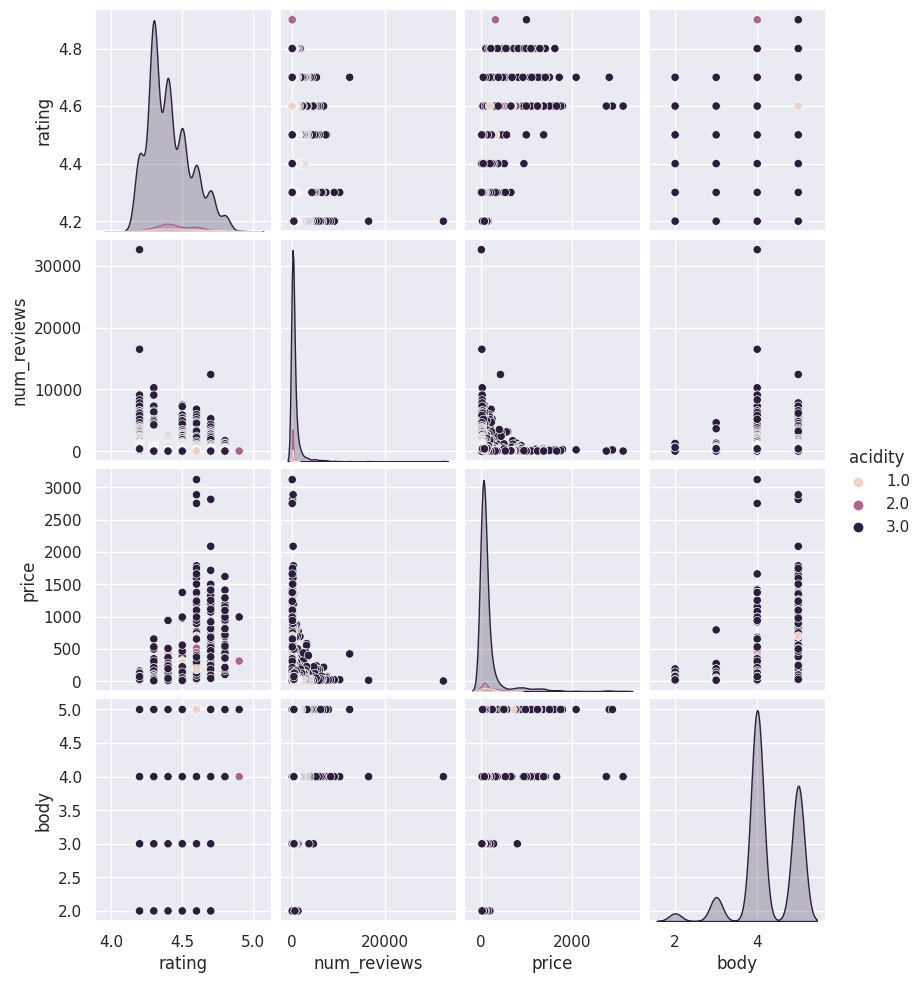

In [58]:
sns.pairplot(
    data=wine1, 
    aspect=.85,
    hue='acidity');

Text(0, 0.5, 'Rating of wine')

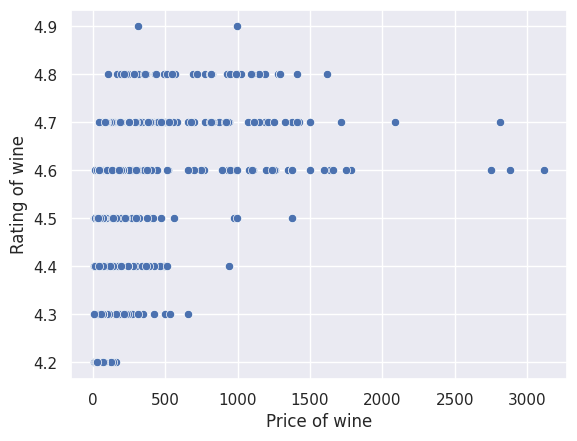

In [63]:
sns.set(font_scale=1)
sns.scatterplot(x='price', y='rating', 
    data=wine1)
plt.xlabel(
    'Price of wine')
plt.ylabel('Rating of wine')

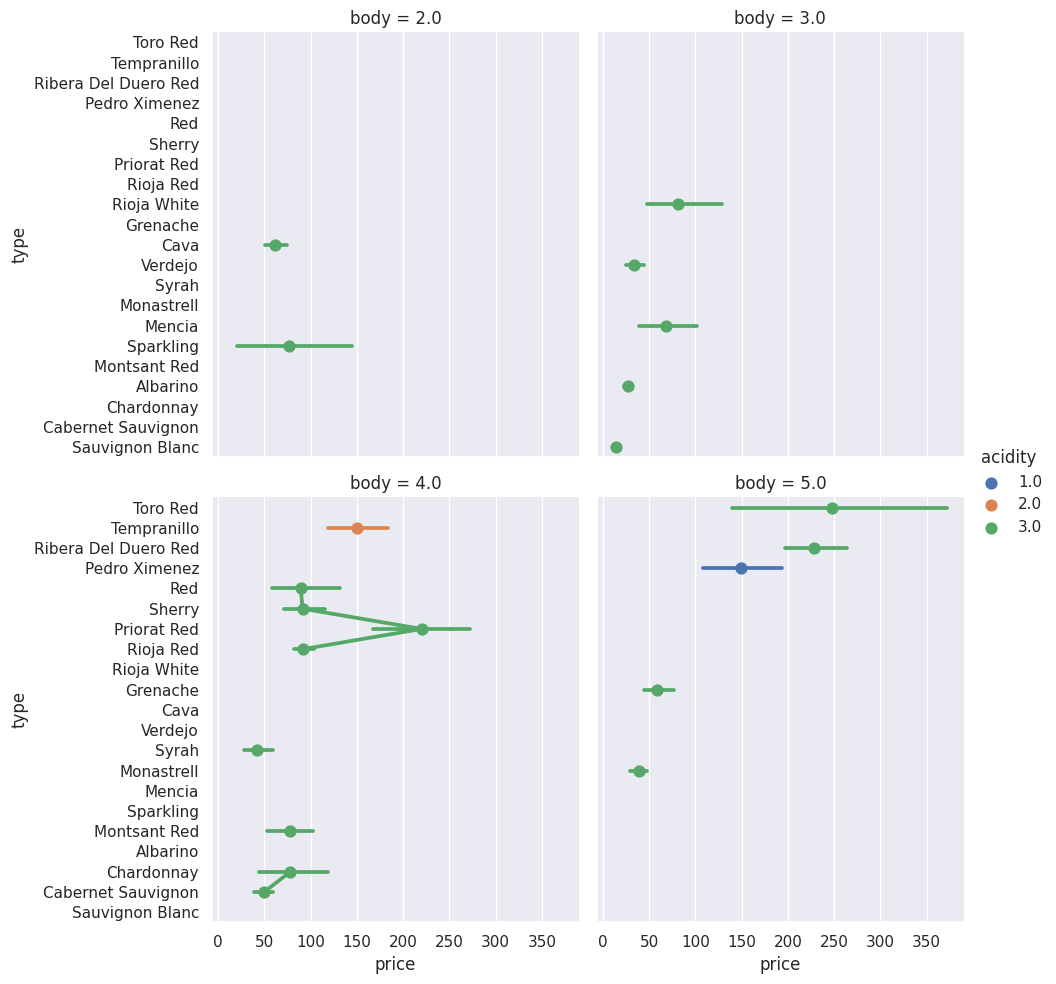

In [68]:
sns.catplot(x='price', y='type', data=wine1, height=5, 
            aspect=1, kind='point', hue='acidity', col='body', col_wrap=2);

Text(0, 0.5, 'Rating of wine')

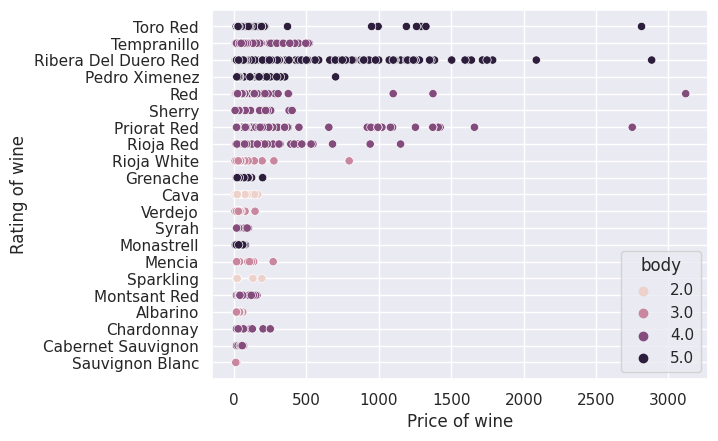

In [73]:
sns.set(font_scale=1)
sns.scatterplot(x='price', y='type', hue='body',
                data=wine1)
plt.xlabel(
    'Price of wine')
plt.ylabel('Rating of wine')

## Preprocessing

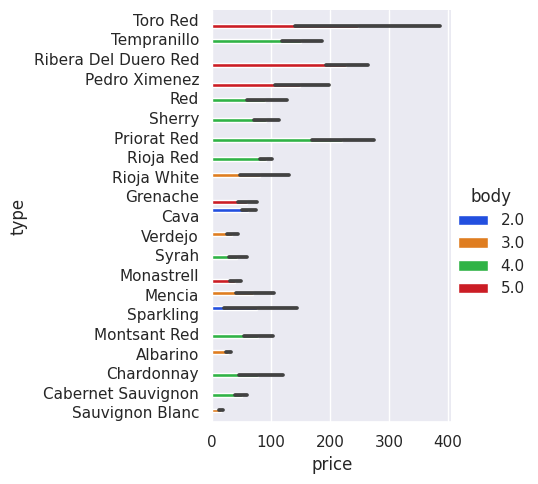

In [77]:
sns.catplot(
    x='price', 
    y='type', 
    data=wine1,
    palette='bright',
    kind='bar',
    hue='body');

I know I need to go back and explain some plots. I'm also struggling with which visuals to chose or if I need to keep creating more visuals to provide better data.

## Models